In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import finnhub
from pprint import pprint
from datetime import datetime
from config import *


In [115]:
dow = pd.read_csv('Resources/DowJones.csv')
nasdaq = pd.read_csv('Resources/Nasdaq.csv')
sp500 = pd.read_csv('Resources/SP500.csv')
merged_df = pd.merge(dow,nasdaq, how='left', on='Date', suffixes=(' Dow', ' Nasdaq'))
merged_df = pd.merge(merged_df, sp500, how='left', on='Date')

In [128]:
merged_df.rename(columns={'Value S&P500': 'Value S&P 500'}, inplace=True)
merged_df.head()

,Date,Value Dow,Value Nasdaq,Value S&P 500
0,1977-09-02,872.31,100.83,97.45
1,1977-09-09,857.04,100.91,96.37
2,1977-09-16,856.81,100.74,96.48
3,1977-09-23,839.14,99.57,95.04
4,1977-09-30,847.11,100.85,96.53


In [134]:
merged_df['Date'].to_datetime()

TypeError: data type "datetime" not understood

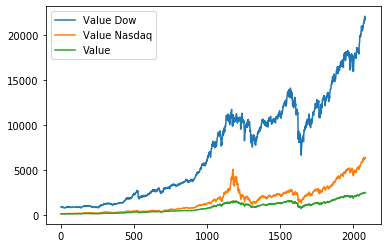

In [118]:
merged_df.plot()

In [79]:
base_url = f'https://finnhub.io/api/v1'

In [102]:
dow = ['MSFT','AAPL','V','JPM','JNJ','WMT','PG','INTC','UNH','XOM','HD','DIS','KO','VZ','MRK',
      'PFE','CVX','CSCO','BA','MCD','NKE','IBM','UTX','AXP','MMM','GS','CAT','WBA','DWDP','TRV']
stock = 'TSLA'

In [125]:
start_date = datetime(2005,1,1)
start_date = int(datetime.timestamp(start_date))

end_date = datetime(2020,1,1)
end_date = int(datetime.timestamp(end_date))

query_url = f'{base_url}/stock/candle?symbol={stock}&resolution=1&from={start_date}&to={end_date}&token={Api_key}' 

# for stock in dow:
response = requests.get(query_url).json()
# pprint(response['c'])

KeyError: '52WeekHigh'

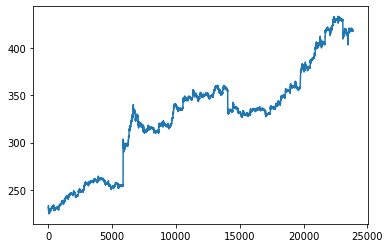

In [104]:
plt.plot(response['c'])
plt.show()

In [ ]:
r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=AAPL&metric=all&token=bs9kujvrh5rahoaohmfg')

In [ ]:
# configuration = finnhub.Configuration(
#     api_key={
#         'token': 'bs9kujvrh5rahoaohmfg'
#     })

# finnhub_client = finnhub.DefaultApi(finnhub.ApiClient(configuration))
# pprint(finnhub_client.stock_candles('NDAQ', 'D', 1593561600, 1595203200))

In [48]:
r = requests.get('https://finnhub.io/api/v1/stock/symbol?exchange=US&token=bs9kujvrh5rahoaohmfg')
pprint(r.json())

8950